#### 1. 开源制图库cartopy绘图基础
Cartopy是在matplotlib库基础上开发的，其与matplotlib的区别在于添加了与地理信息相关的功能，如添加投影、添加海岸线等。



In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat ## 添加地理要素底图


#### 1.带投影坐标系画布创建及添加基本地理要素 

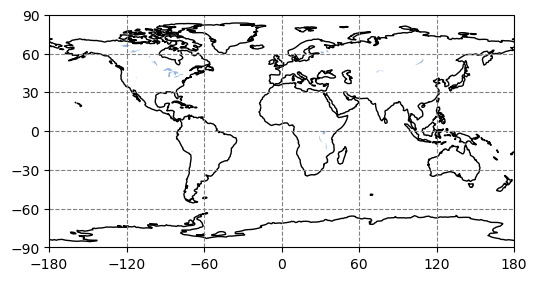

In [8]:
### 1.1 cartopy投影：
#### 添加地理要素、添加经纬度及格网
proj = ccrs.PlateCarree()
fig, ax_geo = plt.subplots(figsize=(6,6), 
                           subplot_kw={'projection': proj})
ax_geo.add_feature(cfeat.COASTLINE)  ## 添加海岸线
ax_geo.add_feature(cfeat.LAKES)    ## 添加湖泊
x_ticks = [-180,-120, -60, 0, 60, 120, 180]  ## 经度范围
y_ticks = [-90, -60, -30, 0, 30, 60,90]    ## 纬度范围
ax_geo.set_xticks(x_ticks)    ## 添加经纬度
ax_geo.set_yticks(y_ticks)
ax_geo.gridlines(linestyle='--', color='grey')


Text(0.5, 1.0, 'angle-equal projection')

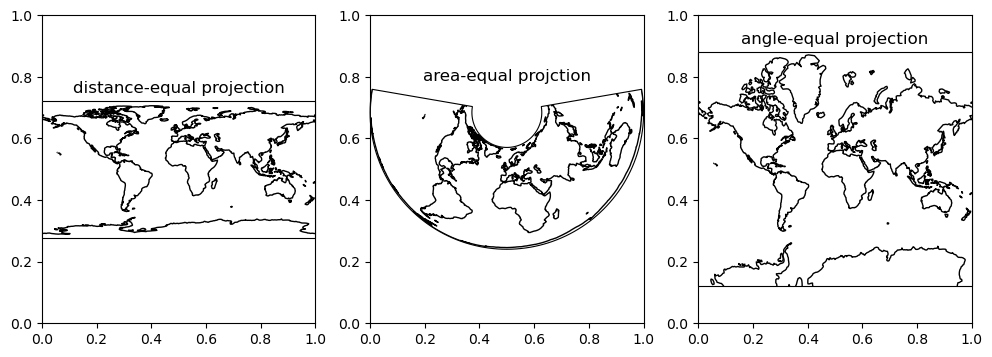

In [12]:
proj_1 = ccrs.PlateCarree()     ### 等距圆柱投影，经纬度格网
proj_2 = ccrs.AlbersEqualArea() ### 阿尔伯斯等面积投影
proj_3 = ccrs.Mercator()        ### 等角圆柱投影
fig, ax_geo = plt.subplots(1, 3, figsize=(12, 4))
ax_geo[0] = fig.add_subplot(1,3,1, projection=proj_1)
ax_geo[0].add_feature(cfeat.COASTLINE)
ax_geo[0].set_title('distance-equal projection')

ax_geo[1] = fig.add_subplot(1,3,2, projection=proj_2)
ax_geo[1].add_feature(cfeat.COASTLINE)
ax_geo[1].set_title('area-equal projction')

ax_geo[2] = fig.add_subplot(1,3,3, projection=proj_3)
ax_geo[2].add_feature(cfeat.COASTLINE)
ax_geo[2].set_title('angle-equal projection')


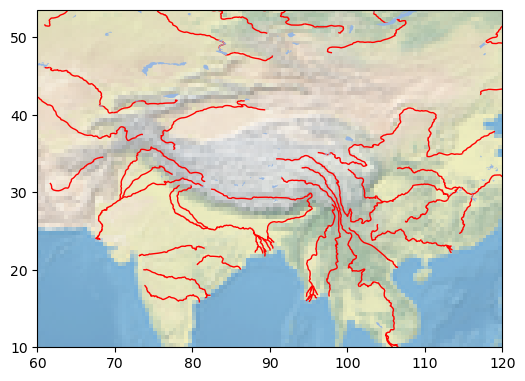

In [14]:
## 1.2 添加地理要素
fig, ax_geo = plt.subplots(figsize=(6,6), 
                           subplot_kw={'projection': proj_1})
ax_geo.add_feature(cfeat.LAND)
ax_geo.add_feature(cfeat.OCEAN)
ax_geo.add_feature(cfeat.RIVERS, edgecolor='red')
ax_geo.add_feature(cfeat.LAKES)
ax_geo.stock_img()   ### 添加地形底图
ax_geo.set_extent([60.0, 120.0, 10, 50.0])
x_ticks = [60.0, 70, 80, 90, 100, 110, 120.0]## 经度范围
y_ticks = [10, 20, 30, 40, 50]    ## 纬度范围
ax_geo.set_xticks(x_ticks)    ## 添加经纬度
ax_geo.set_yticks(y_ticks);


#### 2. 不同投影坐标系地理数据显示

In [59]:
#### 2. 利用开源制图库cartopy进行gis数据可视化
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
import geopandas as gpd
import rasterio as rio

In [ ]:
### 2.1 矢量数据显示
path_kunming = 'data/section-6/kunming_districts.gpkg' ## wgs84
path_rsimg = 'data/section-6/s2_20m_6bands_chenggong.tif'

In [65]:
kunming_gpd = gpd.read_file(path_kunming)
print(kunming_gpd.crs)
rsimg_rio = rio.open(path_rsimg)
print(rsimg_rio.crs)


EPSG:4326
EPSG:32648


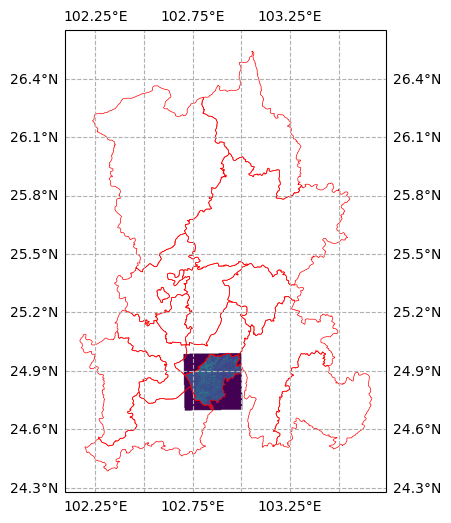

In [75]:
proj = ccrs.PlateCarree()
proj_utm=ccrs.UTM(zone=48, southern_hemisphere=False)
fig, ax_geo = plt.subplots(figsize=(6,6), 
                           subplot_kw={'projection': proj})
kunming_gpd.plot(ax=ax_geo, facecolor='none', 
                 edgecolor = 'red', linewidth=0.5)
extent_rsimg = [rsimg_rio.bounds[0], rsimg_rio.bounds[2],
               rsimg_rio.bounds[1], rsimg_rio.bounds[3]]
ax_geo.imshow(rsimg_rio.read(1), extent=extent_rsimg, transform=proj_utm)
grid = ax_geo.gridlines(draw_labels=True, linestyle='--')  ## 添加格网
